In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path
from datetime import date, datetime
import re
import seaborn as sns

In [2]:
sns.set()

In [3]:
# Define variáveis
path_csv = Path('/Users/wesleyalmeida/GitHub/ribon-parquet')
csv_usersFile = 'ribon_users_features_2019-10-27.csv'

In [4]:
# Carrega dataframe de users
users = pd.read_csv(path_csv/csv_usersFile, parse_dates=['firstAccess', 'lastAccess'])
print(users.shape)
users.info(),
users.head()

(142849, 103)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142849 entries, 0 to 142848
Columns: 103 entries, userId to cohort
dtypes: datetime64[ns](2), float64(93), int64(5), object(3)
memory usage: 112.3+ MB


,userId,deviceModel,countryISO,firstAccess,lastAccess,activeDays,calendarDays,donationTotal,averageEventActiveDay,averageEventCalendarDay,...,ClickedInviteFriendsBadgeScreenTotal,ClickedToSeeRewardTotal,ReceiveBadgeButtonTotal,ReceiveBadgeCloseTotal,ClickedBadgesUnupdatedTotal,OpenedAdOnFeedViewTotal,ClickedShareFeedTotal,ClickedShareFeedViewTotal,OpenedProfileInfoTotal,cohort
0,1,Moto G4 Plus,BR,2017-11-07,2017-11-07,1,1,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-11
1,10,iOS Emulator,BR,2017-10-18,2019-05-23,21,583,5.0,0.238095,0.008576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-10
2,100,Moto Z (2) Play,BR,2018-12-08,2018-12-08,1,1,6.0,6.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12
3,1000,Nexus 5,BR,2017-12-01,2017-12-01,1,1,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-12
4,10000,Q6,BR,2018-06-24,2018-06-24,1,1,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-06


In [7]:
users.dropna().shape[0]

42072

In [8]:
users[(users.lastAccess >= '2019-08-01') & (users.firstAccess < '2019-06')].shape[0]

24528

In [9]:
users[(users.firstAccess.dt.month == users.lastAccess.dt.month)\
      & (users.firstAccess.dt.year == users.lastAccess.dt.year)\
      & (users.firstAccess < '2019-08')].shape[0]

55432

In [7]:
users[(users.activeDays <= 1)\
      & (users.firstAccess < '2019-05')].shape[0]

10839

In [10]:
users.cohort.nunique()

24

In [11]:
users[['cohort']].groupby('cohort').size()

cohort
2017-08        1
2017-10      354
2017-11      156
2017-12      360
2018-01      369
2018-02      109
2018-03      176
2018-04     1436
2018-05     3304
2018-06     2237
2018-07     1897
2018-08     2076
2018-09     3921
2018-10     2896
2018-11     2669
2018-12     2271
2019-01     7229
2019-02     4103
2019-03     5627
2019-04    12671
2019-05    52347
2019-06     9866
2019-07     9593
2019-08    17181
dtype: int64

In [12]:
users[(users.lastAccess >= '2019-08-01') & (users.lastAccess <= '2019-08-31')]['cohort'].nunique()

23

In [13]:
df = users[(users.lastAccess > '2019-05-01') & (users.activeDays > 2)]
df.shape[0]

74685

In [14]:
# Function to compute the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    
    return x, y

In [15]:
# Specify array of percentiles: percentiles
percentiles = [2.5, 25, 50, 75, 97.5]

In [16]:
df.drop('userId', axis=1).describe()

,activeDays,calendarDays,donationTotal,averageEventActiveDay,averageEventCalendarDay,halfLifeDonation,halfLifeActivityDays,averageDaysBetweenDonationEvents,daysSinceLastDonationEvent,ClickedCollectFeedTotal,...,ClickedEarnedBadgeTotal,ClickedInviteFriendsBadgeScreenTotal,ClickedToSeeRewardTotal,ReceiveBadgeButtonTotal,ReceiveBadgeCloseTotal,ClickedBadgesUnupdatedTotal,OpenedAdOnFeedViewTotal,ClickedShareFeedTotal,ClickedShareFeedViewTotal,OpenedProfileInfoTotal
count,74685.000000,74685.00000,74685.000000,74685.000000,74685.000000,74685.000000,74685.000000,63510.000000,63510.000000,74685.000000,...,74685.000000,74685.000000,74685.000000,74685.000000,74685.000000,74685.000000,74685.000000,74685.000000,74685.000000,74685.000000
mean,23.788016,84.23014,31.989730,1.572561,0.655561,29.223753,31.578269,9.717731,15.741033,38.899819,...,0.553110,0.034438,0.353605,2.965656,4.306983,0.035215,0.025989,0.014300,0.021477,0.000040
std,33.918169,91.04275,48.348295,1.516624,1.140926,45.478254,46.686722,16.208200,29.064432,41.414839,...,2.308618,0.235825,1.703910,5.038360,6.269556,0.273814,0.283075,0.272426,0.234290,0.008182
min,3.000000,3.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,20.00000,6.000000,0.736842,0.133333,3.000000,5.000000,2.333333,2.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,61.00000,16.000000,1.300000,0.350515,11.000000,15.000000,4.642857,5.000000,23.000000,...,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.000000,116.00000,36.000000,2.000000,0.833333,39.000000,41.000000,10.432143,15.000000,56.000000,...,0.000000,0.000000,0.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,552.000000,696.00000,1330.000000,82.750000,82.750000,598.000000,604.000000,484.000000,565.000000,232.000000,...,106.000000,6.000000,82.000000,48.000000,51.000000,12.000000,53.000000,53.000000,25.000000,2.000000


count    74685.000000
mean        23.788016
std         33.918169
min          3.000000
25%          5.000000
50%         11.000000
75%         27.000000
max        552.000000
Name: activeDays, dtype: float64


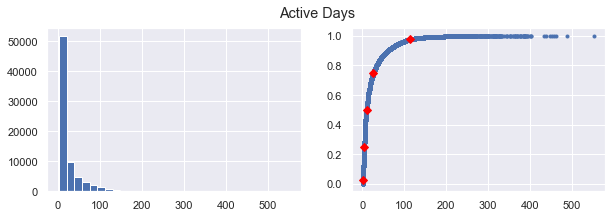

In [17]:
dados = df.activeDays
label = 'activeDays'

# Generate subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
_ = fig.suptitle('Active Days')

# Plot histogram
_ = ax1.hist(dados, bins=30)

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(dados)

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(dados, percentiles)

# Plot the ECDF
_ = ax2.plot(x_vers, y_vers, '.')

# Overlay percentiles as red diamonds.
ptiles = [x/100 for x in percentiles]
_ = ax2.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')

print(dados.describe())

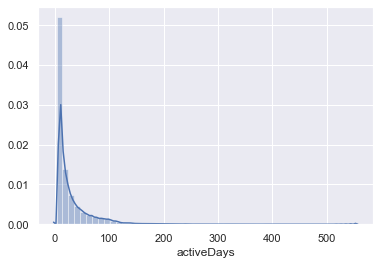

In [19]:
sns.distplot(df['activeDays'])

count    74685.00000
mean        84.23014
std         91.04275
min          3.00000
25%         20.00000
50%         61.00000
75%        116.00000
max        696.00000
Name: calendarDays, dtype: float64


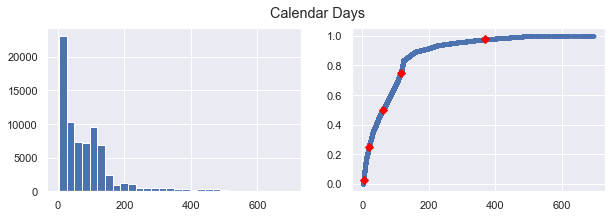

In [20]:
dados = df.calendarDays

# Generate subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
_ = fig.suptitle('Calendar Days')

# Plot histogram
_ = ax1.hist(dados, bins=30)

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(dados)

# Plot the ECDF
_ = ax2.plot(x_vers, y_vers, '.')

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(dados, percentiles)

# Overlay percentiles as red diamonds.
ptiles = [x/100 for x in percentiles]
_ = ax2.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')

print(dados.describe())

count    74685.000000
mean        31.989730
std         48.348295
min          0.000000
25%          6.000000
50%         16.000000
75%         36.000000
max       1330.000000
Name: donationTotal, dtype: float64


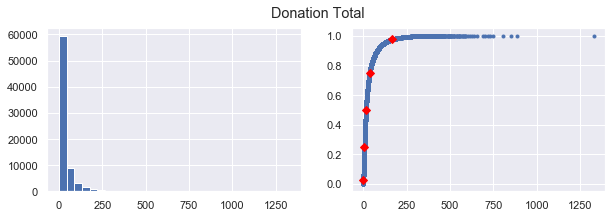

In [21]:
dados = df.donationTotal

# Generate subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
_ = fig.suptitle('Donation Total')

# Plot histogram
_ = ax1.hist(dados, bins=30)

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(dados)

# Plot the ECDF
_ = ax2.plot(x_vers, y_vers, '.')

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(dados, percentiles)

# Overlay percentiles as red diamonds.
ptiles = [x/100 for x in percentiles]
_ = ax2.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')

print(dados.describe())

count    74685.000000
mean         1.572561
std          1.516624
min          0.000000
25%          0.736842
50%          1.300000
75%          2.000000
max         82.750000
Name: averageEventActiveDay, dtype: float64


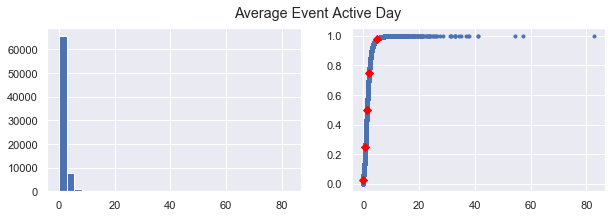

In [22]:
dados = df.averageEventActiveDay

# Generate subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
_ = fig.suptitle('Average Event Active Day')

# Plot histogram
_ = ax1.hist(dados, bins=30)

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(dados)

# Plot the ECDF
_ = ax2.plot(x_vers, y_vers, '.')

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(dados, percentiles)

# Overlay percentiles as red diamonds.
ptiles = [x/100 for x in percentiles]
_ = ax2.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')

print(dados.describe())

count    74685.000000
mean         0.655561
std          1.140926
min          0.000000
25%          0.133333
50%          0.350515
75%          0.833333
max         82.750000
Name: averageEventCalendarDay, dtype: float64


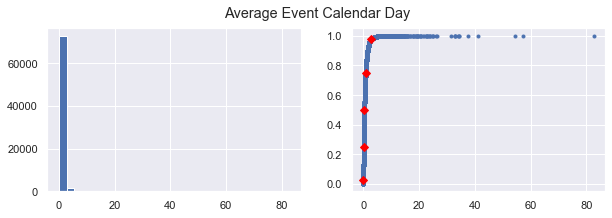

In [24]:
dados = df.averageEventCalendarDay

# Generate subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
_ = fig.suptitle('Average Event Calendar Day')

# Plot histogram
_ = ax1.hist(dados, bins=30)

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(dados)

# Plot the ECDF
_ = ax2.plot(x_vers, y_vers, '.')

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(dados, percentiles)

# Overlay percentiles as red diamonds.
ptiles = [x/100 for x in percentiles]
_ = ax2.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')

print(dados.describe())

count    74685.000000
mean        29.223753
std         45.478254
min          0.000000
25%          3.000000
50%         11.000000
75%         39.000000
max        598.000000
Name: halfLifeDonation, dtype: float64


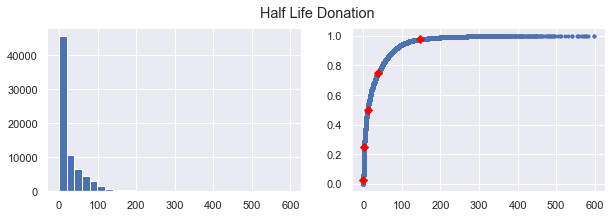

In [23]:
dados = df.halfLifeDonation

# Generate subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
_ = fig.suptitle('Half Life Donation')

# Plot histogram
_ = ax1.hist(dados, bins=30)

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(dados)

# Plot the ECDF
_ = ax2.plot(x_vers, y_vers, '.')

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(dados, percentiles)

# Overlay percentiles as red diamonds.
ptiles = [x/100 for x in percentiles]
_ = ax2.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')

print(dados.describe())

count    74685.000000
mean        31.578269
std         46.686722
min          2.000000
25%          5.000000
50%         15.000000
75%         41.000000
max        604.000000
Name: halfLifeActivityDays, dtype: float64


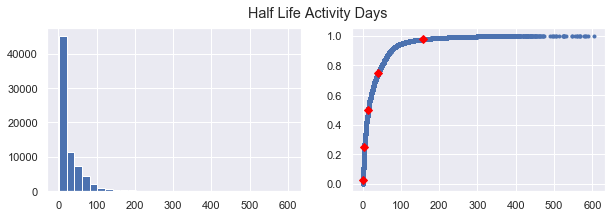

In [25]:
dados = df.halfLifeActivityDays

# Generate subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
_ = fig.suptitle('Half Life Activity Days')

# Plot histogram
_ = ax1.hist(dados, bins=30)

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(dados)

# Plot the ECDF
_ = ax2.plot(x_vers, y_vers, '.')

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(dados, percentiles)

# Overlay percentiles as red diamonds.
ptiles = [x/100 for x in percentiles]
_ = ax2.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')

print(dados.describe())

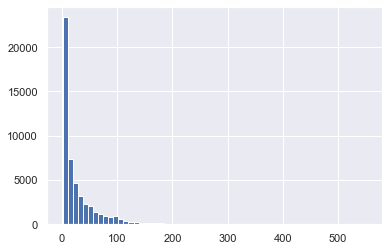

In [34]:
_ = users[(users.lastAccess >= '2019-08-01') & (users.lastAccess <= '2019-08-31')]\
.activeDays.hist(bins=60)

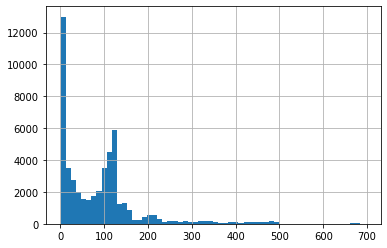

In [95]:
_ = users[(users.lastAccess >= '2019-08-01') & (users.lastAccess <= '2019-08-31')]\
.calendarDays.hist(bins=60)

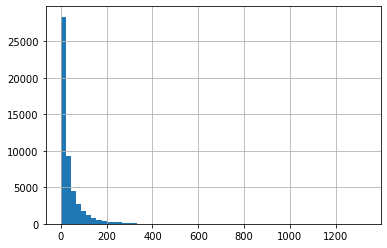

In [99]:
_ = users[(users.lastAccess >= '2019-08-01') & (users.lastAccess <= '2019-08-31')]\
.donationTotal.hist(bins=60)

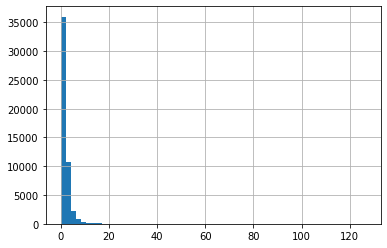

In [14]:
_ = users[(users.lastAccess >= '2019-08-01') & (users.lastAccess <= '2019-08-31')]\
.averageEventActiveDay.hist(bins=60)

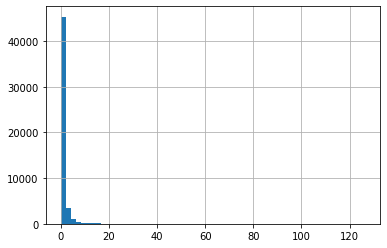

In [15]:
_ = users[(users.lastAccess >= '2019-08-01') & (users.lastAccess <= '2019-08-31')]\
.averageEventCalendarDay.hist(bins=60)

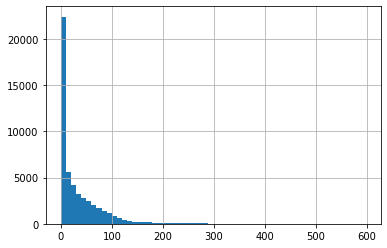

In [16]:
_ = users[(users.lastAccess >= '2019-08-01') & (users.lastAccess <= '2019-08-31')]\
.halfLifeDonation.hist(bins=60)

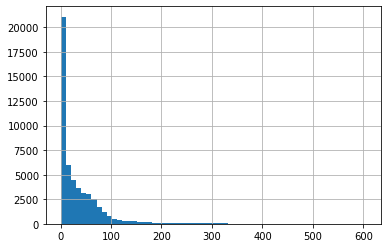

In [17]:
_ = users[(users.lastAccess >= '2019-08-01') & (users.lastAccess <= '2019-08-31')]\
.halfLifeActivityDays.hist(bins=60)

In [19]:
users.drop('userId', axis=1).describe()

,activeDays,calendarDays,donationTotal,averageEventActiveDay,averageEventCalendarDay,halfLifeDonation,halfLifeActivityDays
count,142849.000000,142849.000000,142849.000000,142849.000000,142849.000000,142849.000000,142849.000000
mean,14.631317,54.934847,19.806166,1.535540,0.862382,18.551470,19.505373
std,27.357628,81.306903,38.693456,2.010801,1.807008,37.514808,38.040315
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,1.000000,0.380000,0.050000,1.000000,1.000000
50%,5.000000,19.000000,6.000000,1.100000,0.333333,3.000000,4.000000
75%,14.000000,85.000000,21.000000,2.000000,1.000000,19.000000,21.000000
max,552.000000,696.000000,1330.000000,126.500000,126.500000,598.000000,604.000000


In [21]:
# Function to compute the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    
    return x, y

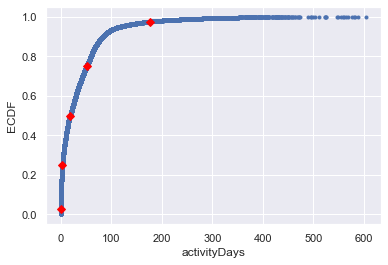

In [44]:
# Plotting the ECDF

dados = users[(users.lastAccess >= '2019-08-01') & (users.lastAccess <= '2019-08-31')]\
.halfLifeActivityDays
label = 'activityDays'

# Specify array of percentiles: percentiles
percentiles = [2.5, 25, 50, 75, 97.5]

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(dados, percentiles)

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(dados)

# Generate plot
# plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel(label)
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
ptiles = [x/100 for x in percentiles]
_ = plt.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

In [111]:
users.averageEventActiveDay.describe()

count    142849.000000
mean          1.535540
std           2.010801
min           0.000000
25%           0.380000
50%           1.100000
75%           2.000000
max         126.500000
Name: averageEventActiveDay, dtype: float64

In [112]:
users.averageEventCalendarDay.describe()

count    142849.000000
mean          0.862382
std           1.807008
min           0.000000
25%           0.050000
50%           0.333333
75%           1.000000
max         126.500000
Name: averageEventCalendarDay, dtype: float64

In [113]:
users.halfLifeDonation.describe()

count    142849.000000
mean         18.551470
std          37.514808
min           0.000000
25%           1.000000
50%           3.000000
75%          19.000000
max         598.000000
Name: halfLifeDonation, dtype: float64

In [114]:
users.halfLifeActivityDays.describe()

count    142849.000000
mean         19.505373
std          38.040315
min           1.000000
25%           1.000000
50%           4.000000
75%          21.000000
max         604.000000
Name: halfLifeActivityDays, dtype: float64

In [110]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142849 entries, 0 to 142848
Data columns (total 13 columns):
userId                     142849 non-null int64
deviceModel                142849 non-null object
countryISO                 142849 non-null object
firstAccess                142849 non-null datetime64[ns]
lastAccess                 142849 non-null datetime64[ns]
activeDays                 142849 non-null int64
calendarDays               142849 non-null int64
donationTotal              142849 non-null float64
averageEventActiveDay      142849 non-null float64
averageEventCalendarDay    142849 non-null float64
halfLifeDonation           142849 non-null int64
halfLifeActivityDays       142849 non-null int64
cohort                     142849 non-null object
dtypes: datetime64[ns](2), float64(3), int64(5), object(3)
memory usage: 14.2+ MB
